In [104]:
import pandas as pd
import numpy as np
import sys, os
from importlib import reload

# Append path for testing - use pyproject for the future
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import analysis_functions as f
reload(f)

from create_tabulation import generate_tabulations, generate_and_save_tabulations

In [105]:
df = pd.read_csv("../data/bank-full.csv", delimiter=';')

In [106]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [107]:
# Convert 'y' to numeric for analysis
df["target"] = np.where(df["y"] == "no", 0, 1)

# Add weights to test weight functionality of plot_target_vs_predictors()
df["weights"] = np.abs(np.random.randn(len(df.index)))

# Add faux prediction column for testing functions
df["pred"] = (df["target"] + np.random.normal(0, 0.1, size=len(df.index))).clip(0, 1)

# Add an arbitrary data split for testing functions
df["split"] = np.where(df.index > int(df.shape[0] * 0.70), "V", "T")

In [108]:
df["split"].value_counts(dropna=False, normalize=True)

T    0.700007
V    0.299993
Name: split, dtype: float64

In [109]:
df[["pred", "target"]].describe()

,pred,target
count,45211.000000,45211.000000
mean,0.147937,0.116985
std,0.301502,0.321406
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.018013,0.000000
75%,0.104409,0.000000
max,1.000000,1.000000


## plot_target_vs_predictors function

In [110]:
predictors =  ["job", "balance", "contact", "duration", "marital", "job", "pdays", "previous"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

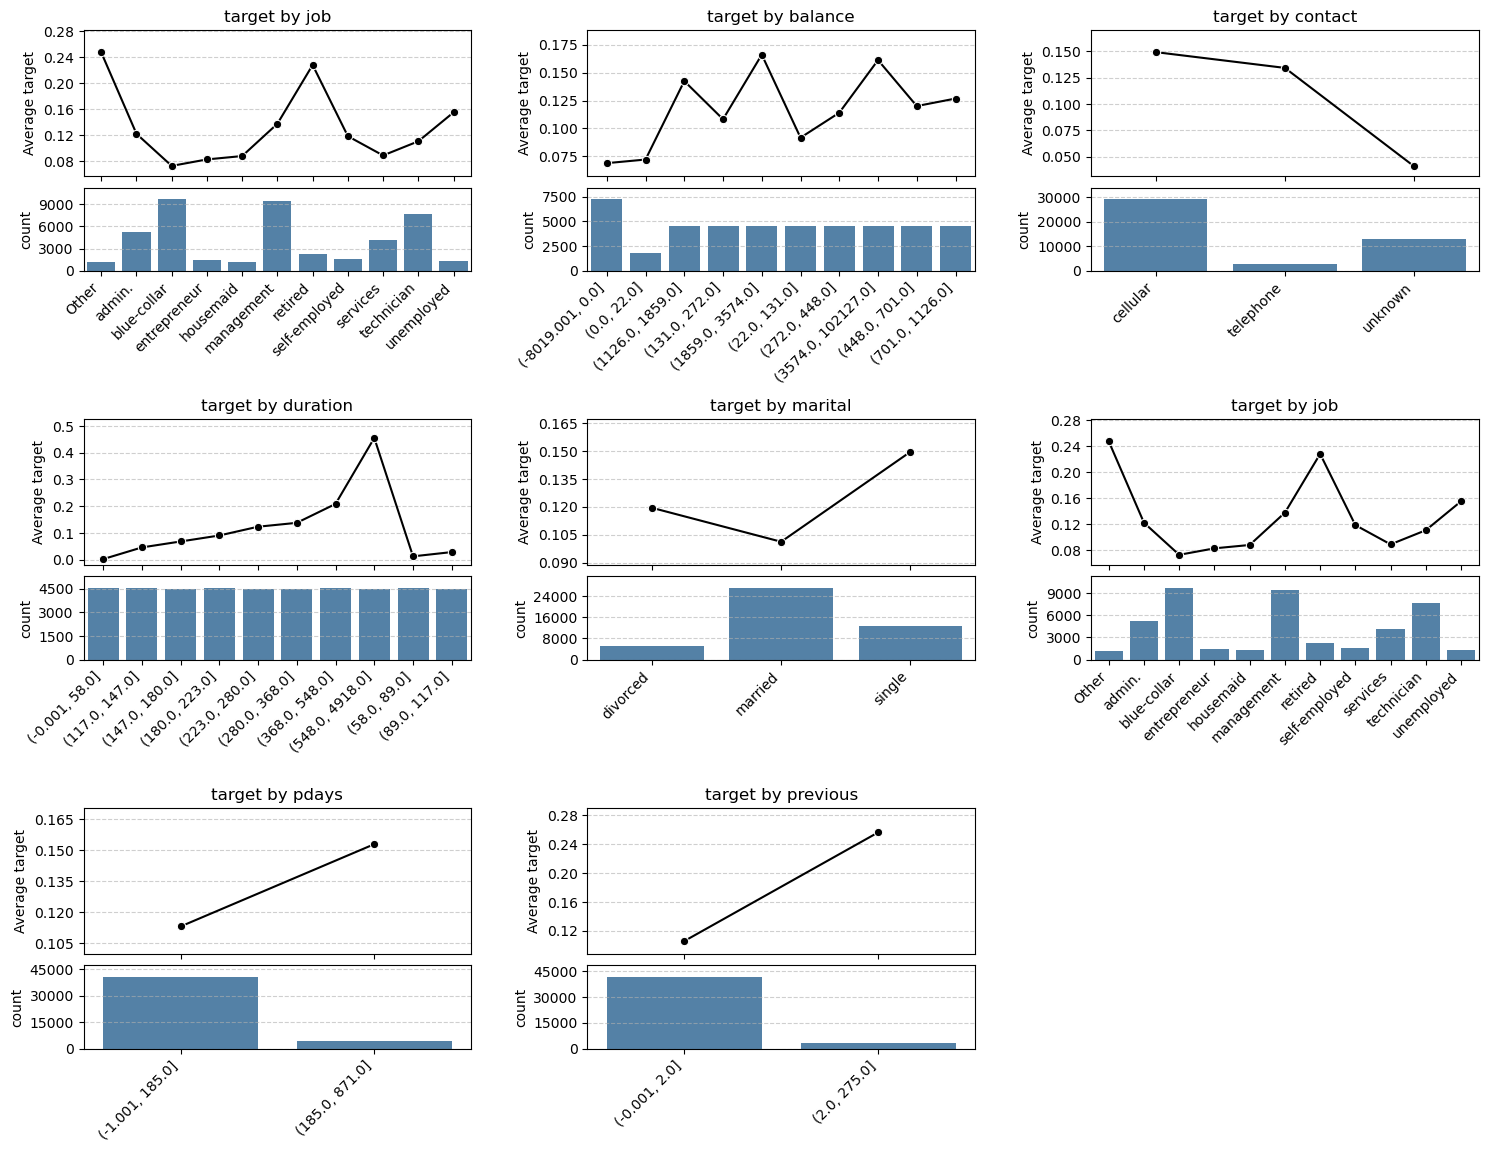

In [111]:
reload(f)
f.plot_target_vs_predictors(df, "target", predictors)

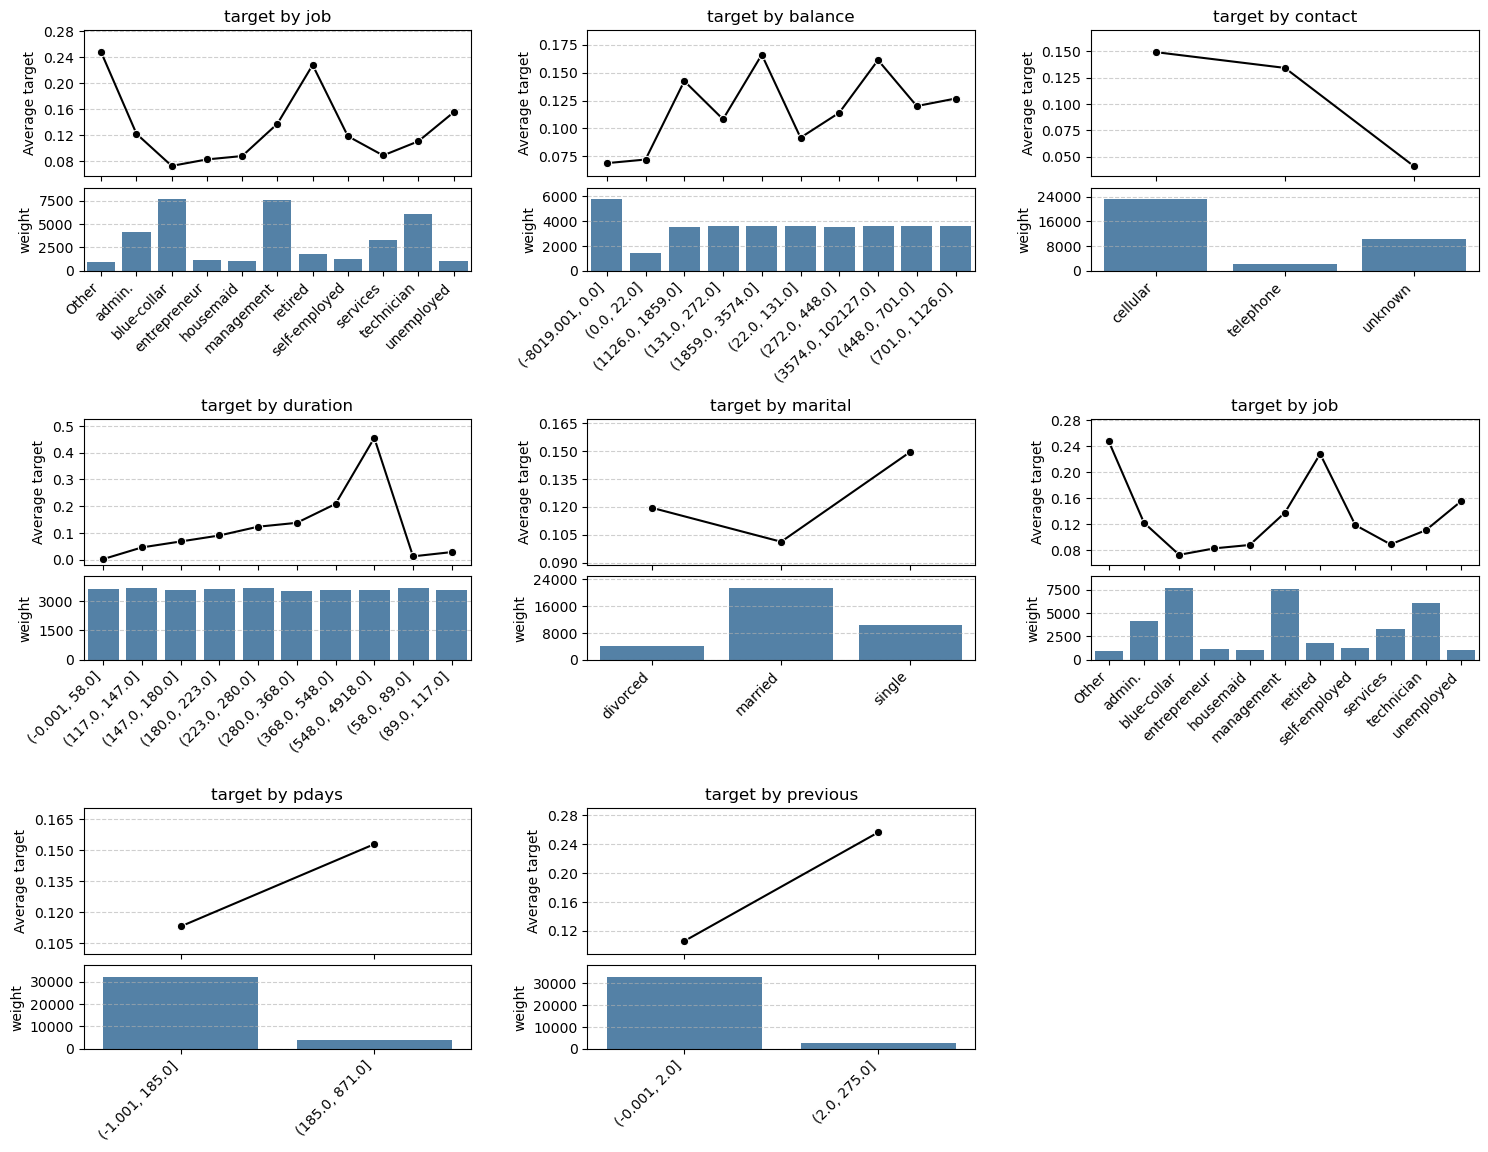

In [112]:
f.plot_target_vs_predictors(df, "target", predictors, weight_col="weights")

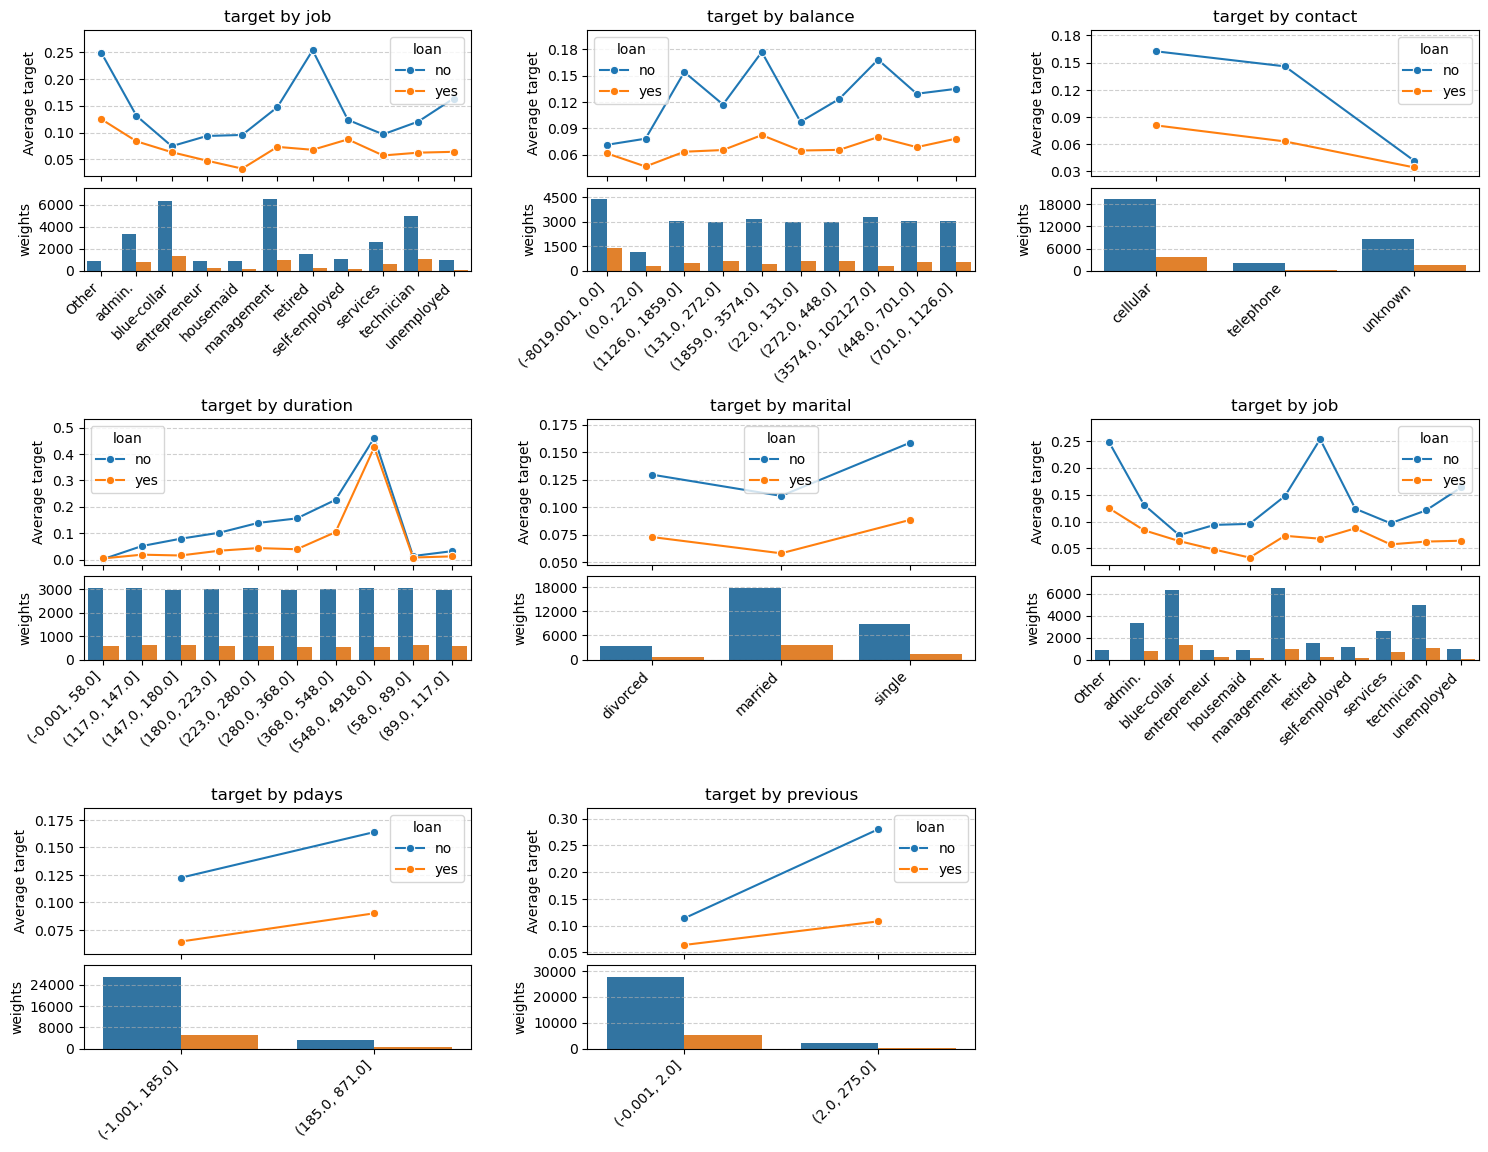

In [113]:
reload(f)
f.plot_target_vs_predictors(df, "target", predictors, group_col="loan", weight_col="weights")

## Explore creation of tabulation function and object

In [131]:
reload(ct) 
tabs = ct.generate_and_save_tabulations(
    df=df,
    prediction_col="pred",
    truth_col="target",
    group_vars=predictors,
    weights_col="weights",
    split_col="split",
    n_bins=10,
)


Tabulation report written to: tabulations.html
